In [25]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# helpful character encoding module
import charset_normalizer

In [6]:
# read in all our data
Bank = pd.read_csv("/content/bank_data.csv")

# set seed for reproducibility
np.random.seed(0)

In [7]:
Bank

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [8]:
Bank.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [9]:
# get the number of missing data points per column
missing_values_count = Bank.isnull().sum()
missing_values_count

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [11]:
# how many total missing values do we have?
total_cells = np.product(Bank.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


In [12]:
#get all the unique values in the 'expected_recovery_amount' column
expected_recovery_amount = Bank['expected_recovery_amount']
expected_recovery_amount

0        194
1        486
2        527
3        536
4        541
        ... 
1877    9785
1878    9857
1879    9859
1880    9920
1881    9964
Name: expected_recovery_amount, Length: 1882, dtype: int64

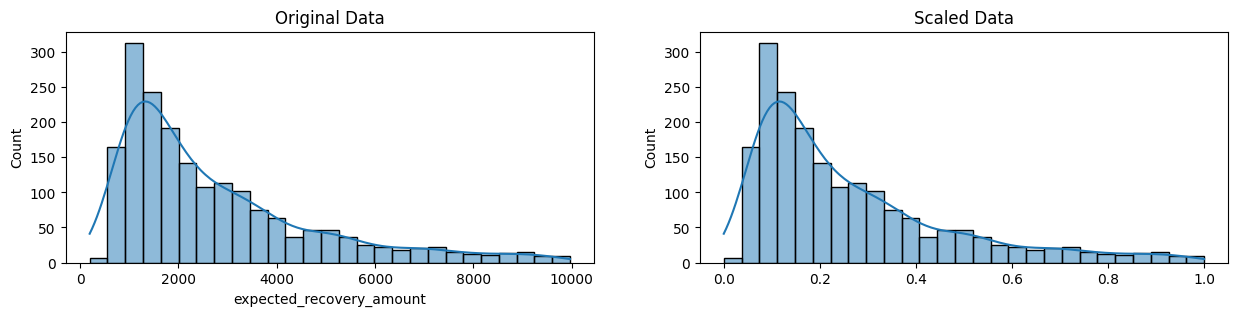

0        194
1        486
2        527
3        536
4        541
        ... 
1877    9785
1878    9857
1879    9859
1880    9920
1881    9964
Name: expected_recovery_amount, Length: 1882, dtype: int64

In [20]:
# Extract the values from the third column
second_column_data = Bank.iloc[:, 1]

# Apply min-max scaling to the data
scaled_data = minmax_scaling(second_column_data.values.reshape(-1, 1),columns=[0])

# Plot both original and scaled data
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(second_column_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled Data")
plt.show()
second_column_data

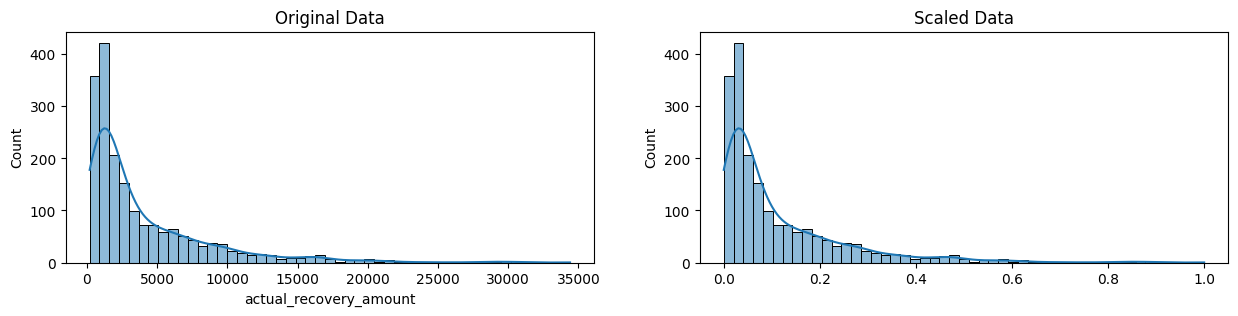

0         263.540000
1         416.090000
2         429.350000
3         296.990000
4         346.385000
            ...     
1877    15388.195990
1878     9709.909257
1879    30209.181790
1880    20386.232190
1881    16706.305920
Name: actual_recovery_amount, Length: 1882, dtype: float64

In [27]:
# Extract the values from the third column
third_column_data = Bank.iloc[:, 2]

# Apply min-max scaling to the data
scaled_data = minmax_scaling(third_column_data.values.reshape(-1, 1),columns=[0])

# Plot both original and scaled data
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(third_column_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled Data")
plt.show()
third_column_data

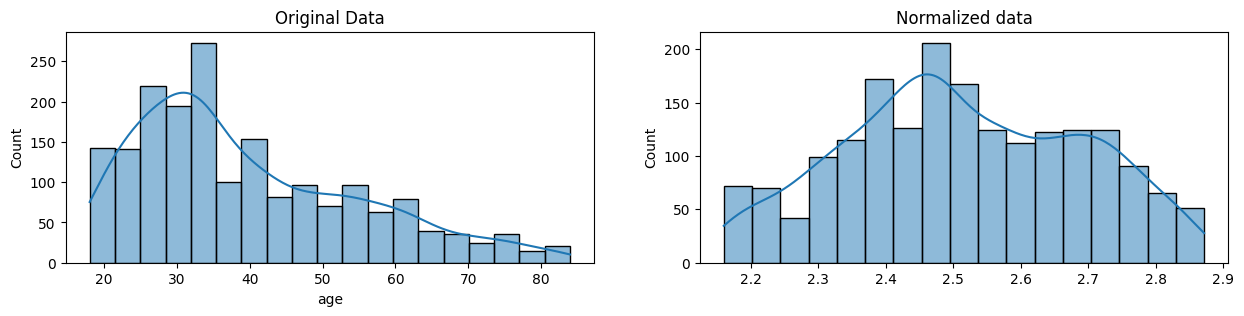

In [34]:
#normalize the exponential data with boxcox

normalized_data = stats.boxcox(Bank['age'])

#plot both together to compare

fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(Bank['age'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

In [21]:
#get all the unique values in the 'expected_recovery_amount' column
actual_recovery_amount = Bank['actual_recovery_amount']
actual_recovery_amount

0         263.540000
1         416.090000
2         429.350000
3         296.990000
4         346.385000
            ...     
1877    15388.195990
1878     9709.909257
1879    30209.181790
1880    20386.232190
1881    16706.305920
Name: actual_recovery_amount, Length: 1882, dtype: float64

In [23]:
# get all the unique values in the 'recovery_strategy' column
recovery_strategy = Bank['recovery_strategy'].unique()
recovery_strategy

array(['Level 0 Recovery', 'Level 1 Recovery', 'Level 2 Recovery',
       'Level 3 Recovery', 'Level 4 Recovery'], dtype=object)

In [24]:
# get all the unique values in the 'recovery_strategy' column
sex = Bank['sex'].unique()
sex

array(['Male', 'Female'], dtype=object)

In [26]:
with open("/content/bank_data.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}
